# Chirped Z-transform for vector XY scheme to X scheme


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl

In [3]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)


In [4]:
mpl.rcParams['figure.dpi'] = 125
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['savefig.pad_inches'] = 0.075
mpl.rcParams['figure.subplot.hspace'] = 0.075
mpl.rcParams['figure.subplot.wspace'] = 0.075
mpl.rcParams['figure.subplot.left'] = 0.075

In [5]:
import warnings

warnings.filterwarnings('ignore')


In [6]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_math import Bluestein_dft_xy


In [7]:
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

In [8]:
from numpy import (linspace, sin, cos, arcsin, arctan2, exp, sqrt, pi,
                   meshgrid, isnan, tile, real, angle, sign, mod, ones, zeros)
from numpy.fft import fft, ifft, fftshift

## Example

In [9]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 512)

focal = 16 * um
wavelength = 0.6328 * um


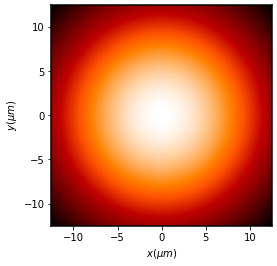

In [10]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(32 * um, 32 * um),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)

u0.draw()

t1 = Scalar_mask_XY(x0, y0, wavelength)

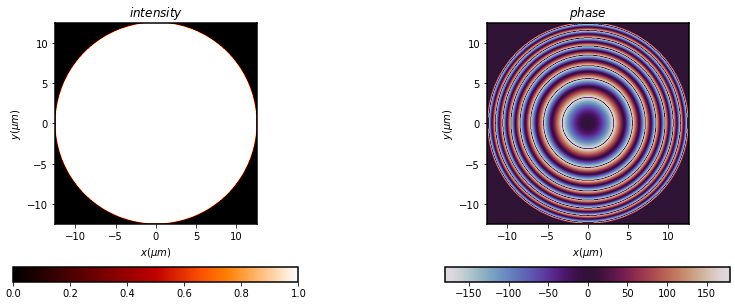

In [11]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens(r0=(0, 0), focal=focal, radius=size / 2)
t.draw('field');


In [12]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_wave(u=u1, v=(1, 0))
EM1.azimuthal_wave(u=u1, r0=(0, 0), radius=(20, 20))
EM1.radial_wave(u=u1, r0=(0, 0), radius=(20, 20))
EM1.constant_wave(u=u1, v=(1, 1+1j))


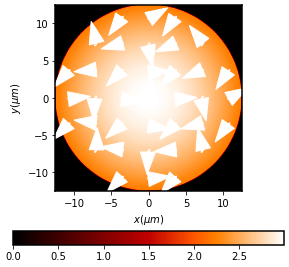

In [13]:
EM1.draw(kind='ellipses', amplification=0.125, num_ellipses=(7, 7))


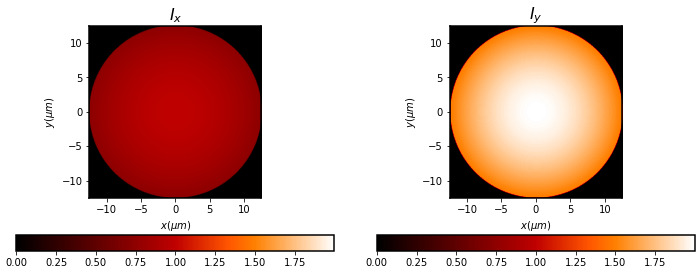

In [14]:
EM1.draw('intensities', logarithm=0);


## Algorithm

# Execution

## xout: 0D, yout: 0D, z: 0D


In [15]:
x_out = 0.
y_out = 0.
z = focal


In [16]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
print(EM2_1D)


((12.01931943234928-2.910555097903726j), (14.929874530253015+9.108764334445558j), (2.7422508708241367e-14+3.7414515929867775e-14j))
CPU times: user 303 ms, sys: 24.6 ms, total: 327 ms
Wall time: 327 ms


## xout: 1D, yout: 0D, z: 0D


In [17]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.
z = focal


CPU times: user 282 ms, sys: 47.5 ms, total: 329 ms
Wall time: 329 ms


<AxesSubplot:xlabel='x ($\\mu$m)', ylabel='I(x)'>

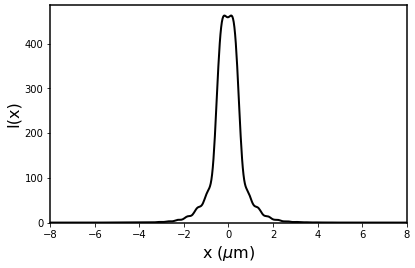

In [19]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
EM2_1D.draw('intensity');

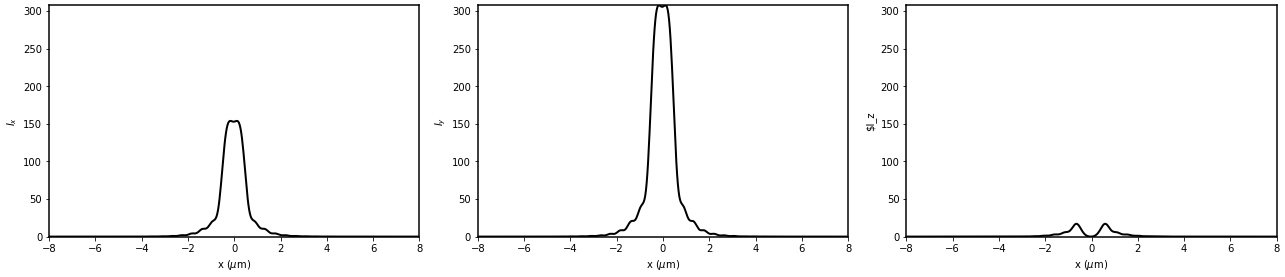

In [20]:
EM2_1D.draw('intensities');


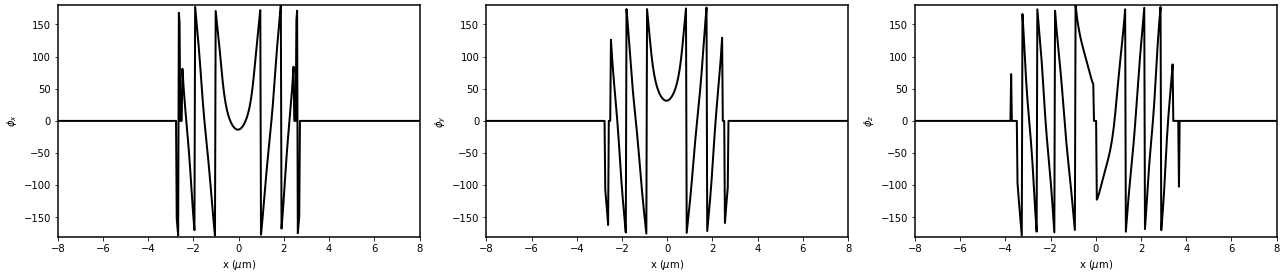

In [21]:
EM2_1D.draw('phases');

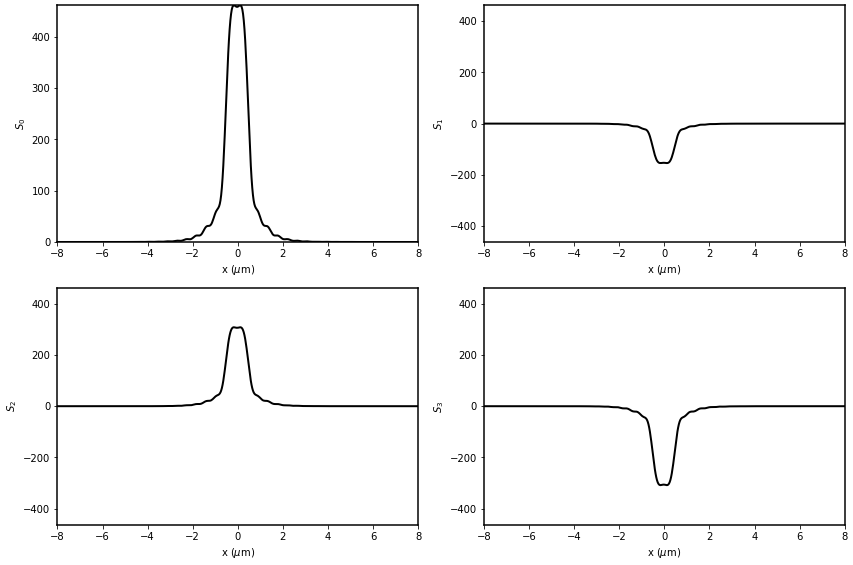

In [22]:
EM2_1D.draw('stokes');

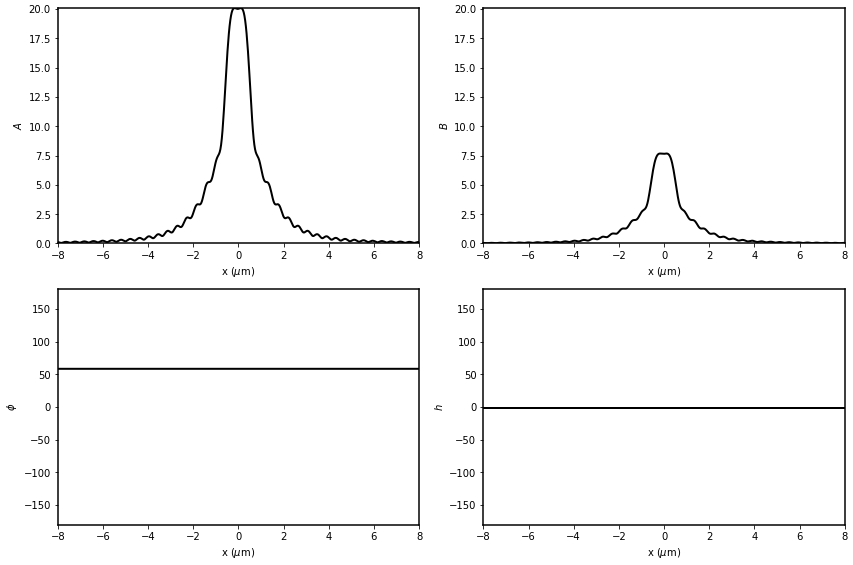

In [23]:
EM2_1D.draw('param_ellipses');


## xout: 0D, yout: 0D, z: 1D


In [24]:
x_out = 0.
y_out = 0.
z = np.linspace(focal - 4 * um - 6 * um, focal - 2 * um + 6 * um, 64)


In [26]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=True);


CPU times: user 13.7 s, sys: 1.02 s, total: 14.7 s
Wall time: 14.7 s


<AxesSubplot:xlabel='z ($\\mu$m)', ylabel='I(z)'>

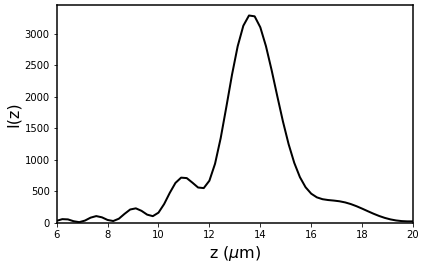

In [27]:
EM2.draw('intensity')


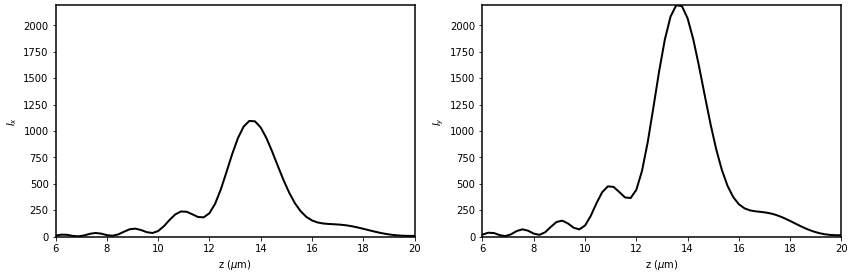

In [28]:
EM2.draw('intensities');


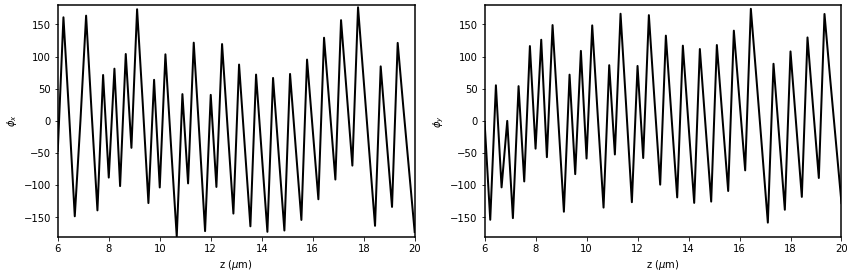

In [29]:
EM2.draw('phases');


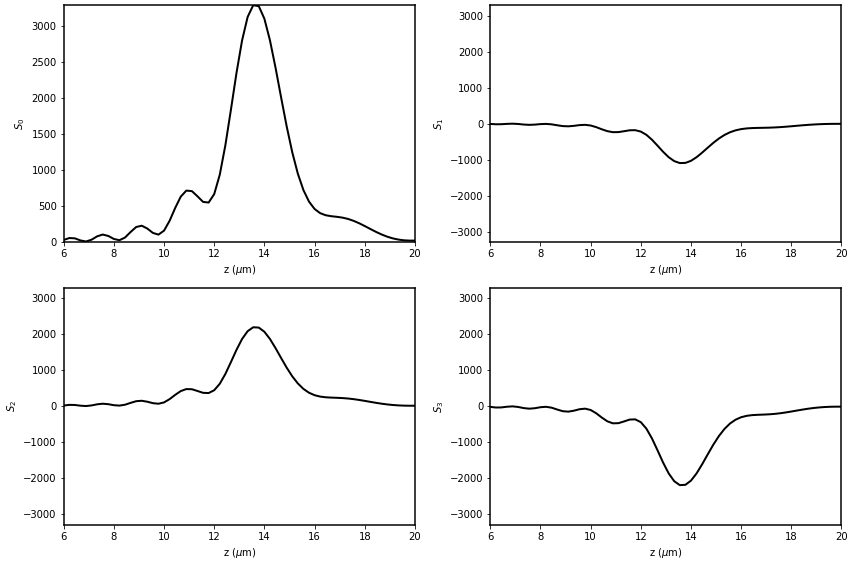

In [30]:
EM2.draw('stokes');


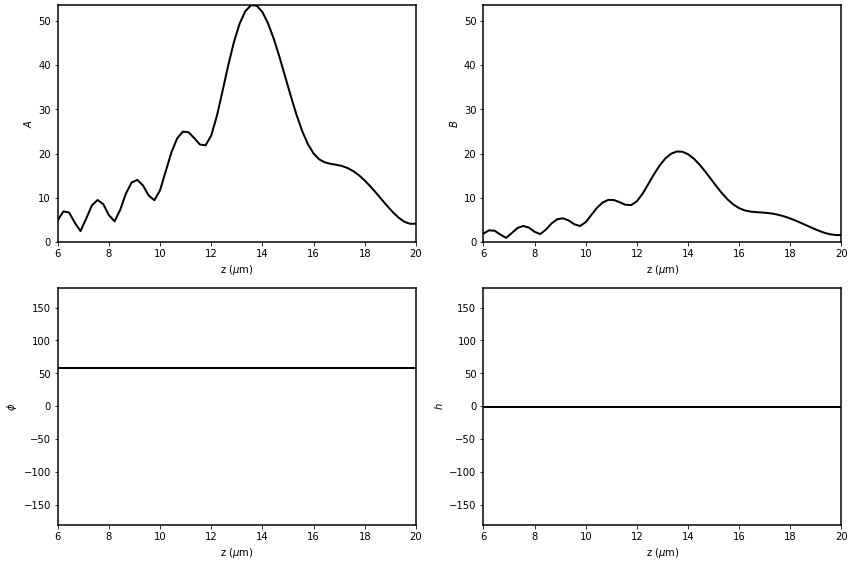

In [31]:
EM2.draw('param_ellipses');


## xout: 1D, yout: 0D, z: 1D


In [32]:
size_out = 5 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = 0.
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 128)


In [33]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=True)


CPU times: user 31.3 s, sys: 2.61 s, total: 33.9 s
Wall time: 33.8 s


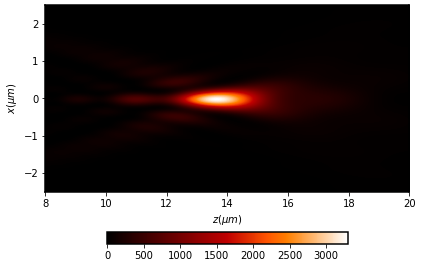

In [34]:
EM2.draw('intensity');

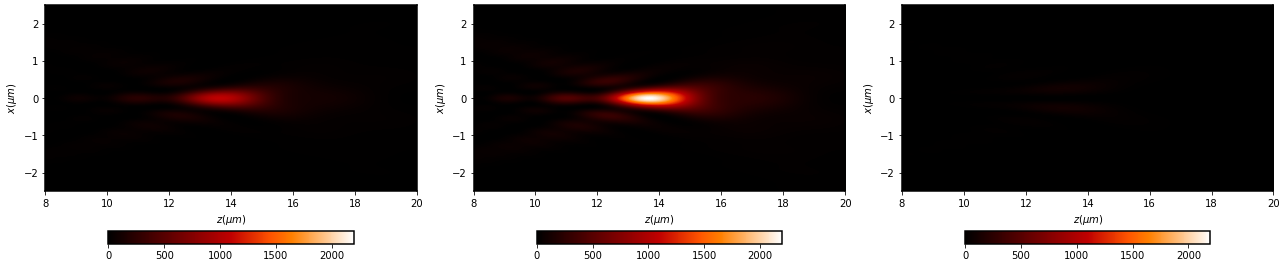

In [35]:
EM2.draw('intensities');

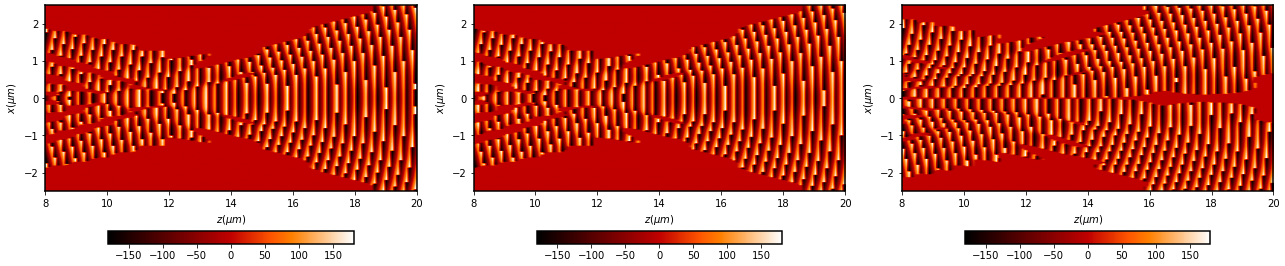

In [36]:
EM2.draw('phases');
plt.savefig('test.png')


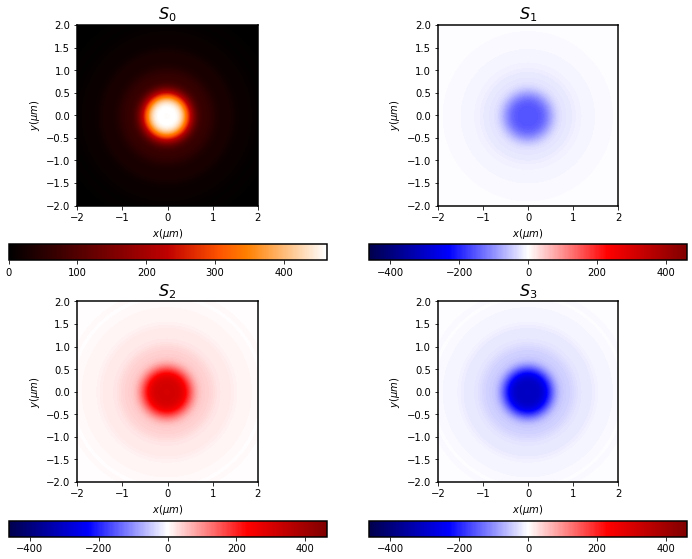

In [47]:
EM2.draw('stokes', logarithm=0);

## xout: 1D, yout: 1D, z: 0D


In [69]:
size_out = 2 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 256)
y_out = np.linspace(-size_out / 2, size_out / 2, 256)
z = focal-2

In [70]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 276 ms, sys: 43.3 ms, total: 319 ms
Wall time: 318 ms


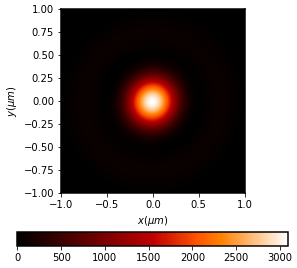

In [71]:
EM2.draw('intensity');


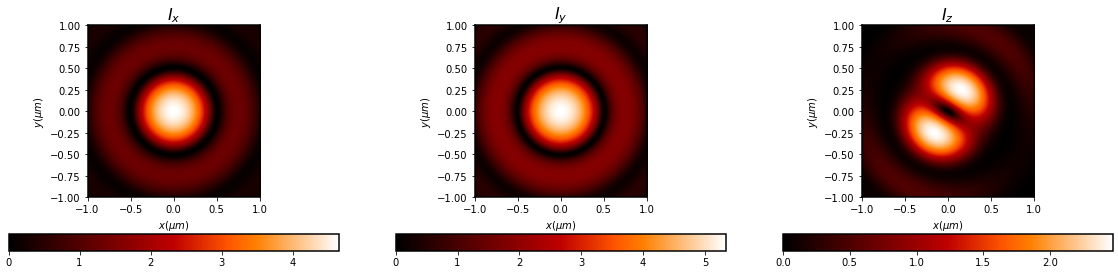

In [78]:
EM2.draw('intensities', logarithm=1e-1);


(<AxesSubplot:title={'center':'$I_r$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

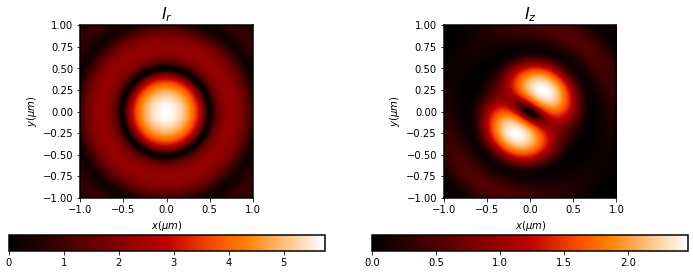

In [79]:
EM2.draw('intensities_rz', logarithm=1e-1)


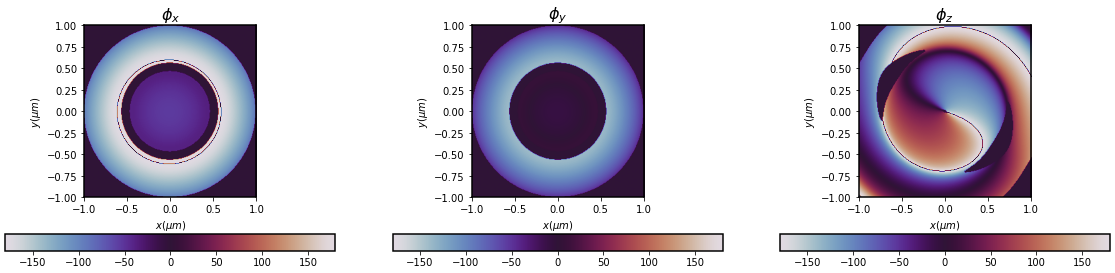

In [74]:
EM2.draw('phases');


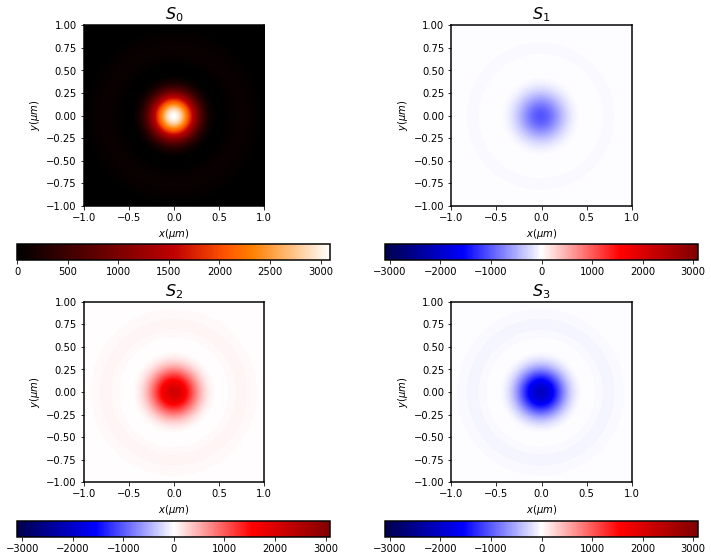

In [81]:
EM2.draw('stokes', logarithm=0);


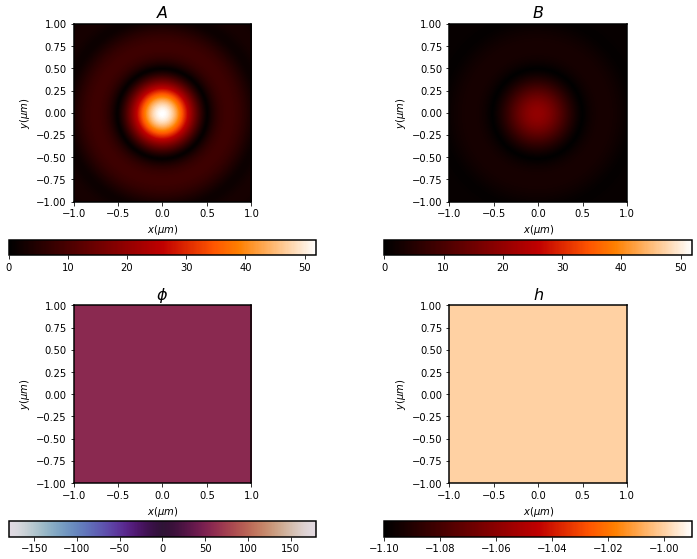

In [76]:
EM2.draw('param_ellipse');


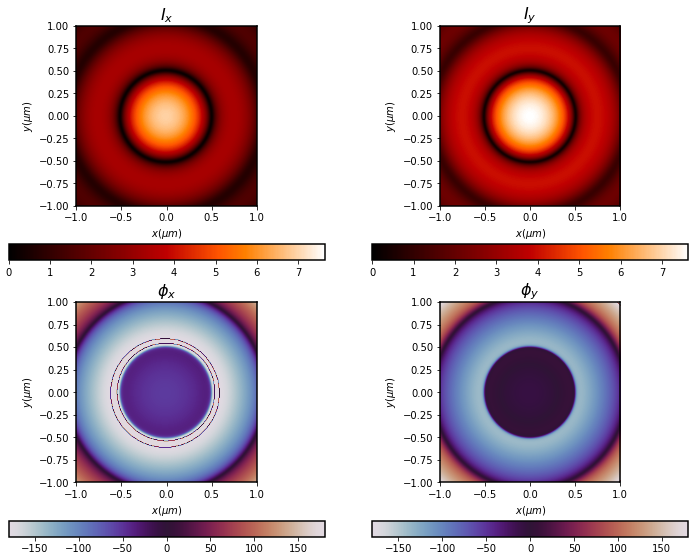

In [77]:
EM2.draw('fields', logarithm=1e0);


## xout: 1D, yout: 1D, z: 0D


In [82]:
size_out = 2 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 64)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)


In [83]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


ImportError: cannot import name 'Vector_field_XYZ' from 'diffractio.vector_fields_XYZ' (/home/luismiguel/bitbucket/diffractio/diffractio/vector_fields_XYZ.py)